In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
# #Исходные данные: x - расходы на рекламу, Y - объемы продаж
# x = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20, 1)
# Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20, 1)
# display(x, Y)


Реализовать класс модели логистической регрессии с использованием:
а) максимизации логарифмического правдоподобия методом градиентного подъема
б) минимизации функции потерь (кросс-энтропии) методом градиентного спуска

Сравнить результаты (время исполнения и достигнутые значения accuracy и f1) в случаях а и б при одном и том же числе шагов и скорости обучения.



In [ ]:
# #Реализуем цикл градиентного спуска
# class LogisticRegressionGD(object):
#     def __init__(self):
#         self.a = None
#     def sigmoid(self, z):
#         return 1/(1 + np.exp(-z))
#     def predict(self, x):
#         return self.sigmoid(np.matmul(x , self.a))
#     def coefs(self):
#         return self.a
#     def LogLikelihood(self, x, Y):
#         return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) + np.matmul(np.ones((1, Y.shape[0])) - np.transpose(Y),
#                                                                                       np.log(np.ones((Y.shape[0], 1)) - self.predict(x) + 1e-8)))[0][0]
#     def CrossEntropy(self, x, Y):
#         return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) - np.matmul(np.ones((1, Y.shape[0])) - np.transpose(Y),
#                                                                                       np.log(np.ones((Y.shape[0], 1)) - self.predict(x) + 1e-8)))[0][0]
#     def accuracy(self, x, Y):
#         return (Y == self.predict(x)).mean()

#     def fit(self, x, Y, alpha = 0.001, epsylon = 0.001, max_steps = 5000, Rtype = "LL"):
#         self.a = np.zeros(x.shape[1]).reshape(x.shape[1],1)
#         steps, errors = [], []
#         step = 0
#         for _ in range(max_steps):
#             if Rtype == "LL":
#                 new_error = self.LogLikelihood(x, Y)
#                 dT_a = np.matmul(np.transpose(x), Y - self.predict(x))
#                 display(np.transpose(x).shape, (Y - self.predict(x)).shape)
#                 display("old a = ",self.a, "new_error = ", new_error, "dT_a = ", dT_a)
#                 self.a += alpha*dT_a
#                 display("new a = ",self.a)
#             elif Rtype == "CE":
#                 new_error = self.CrossEntropy(x, Y)
#                 dT_a = -np.matmul(np.transpose(x), Y - self.predict(x))
#                 #display("old a = ", self.a, "new_error = ", new_error, "dT_a = ", dT_a)
#                 self.a -= alpha*dT_a
#                 #display("new a = ",self.a)
#             step += 1
#             steps.append(step)
#             errors.append(new_error)
#             print(step, new_error)
#             if abs(new_error) < epsylon:
#                 break
#         return steps, errors

In [ ]:
# x_ = x.copy()

# intercept = np.ones((x.shape[0], 1))
# x_ = np.concatenate((intercept, x), axis = 1)


In [ ]:
# start_time = time.time()
# regr = LogisticRegressionGD()
# steps, errors =  regr.fit(x_, Y, alpha = 0.0005, epsylon = 0.001, max_steps = 20000, Rtype = "LL")

# display('Время обучения: ', time.time() - start_time, 'сек.')

In [ ]:
# display(regr.coefs())

# Y_Pred = regr.predict(x_)



# plt.scatter(x, Y)
# plt.scatter(x, Y_Pred)




In [ ]:
# plt.plot(steps, errors)

Реализовать расчеты способами а и б для набора данных из файла insclass_train.csv/
Для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

Требуется построить модель, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);
variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);
variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);
variable_4 - идентификатор года выпуска транспортного средства;
variable_5 - идентификатор страны - производителя транспортного средства;
variable_6 - мощность двигателя в лошадиных силах;
variable_7 - объем двигателя в куб. см;
variable_8 - идентификатор стороны расположения руля (левый или правый);
variable_9 - пробег транспортного средства, покрываемый гарантией производителя;
variable_10 - индикатор действия гарантии на транспортное средство;
variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;
variable_12 - возраст транспортного средства (в мес.);
variable_13 - возраст водителя с максимальным стажем;
variable_14 - коэффициент возраст-стаж;
variable_15 - коэффициент краткосрочности;
variable_16 - коэффициент мощности;
variable_17 - коэффициент "мультидрайв";
variable_18 - территориальный коэффициент;
variable_19 - коэффициент "КНДР";
variable_20 - идентификатор канала продаж;
variable_21 - марка транспортного средства;
variable_22 - модель транспортного средства;
variable_23 - индикатор отечественных транспортных средств;
variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";
variable_25 - индикатор пролонгации;
variable_26 - индикатор совпадения собственника транспортного средства и водителя;
variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";
variable_28 - тип транспортного средства;
target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.

In [ ]:
df = pd.read_csv(r'insclass_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151406 entries, 0 to 151405
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   151406 non-null  object 
 1   variable_2   151406 non-null  int64  
 2   variable_3   151406 non-null  int64  
 3   variable_4   151406 non-null  int64  
 4   variable_5   151406 non-null  object 
 5   variable_6   151295 non-null  float64
 6   variable_7   55767 non-null   float64
 7   variable_8   121507 non-null  float64
 8   variable_9   16970 non-null   float64
 9   variable_10  151406 non-null  int64  
 10  variable_11  151406 non-null  int64  
 11  variable_12  149878 non-null  float64
 12  variable_13  149749 non-null  float64
 13  variable_14  148479 non-null  float64
 14  variable_15  13 non-null      float64
 15  variable_16  151394 non-null  float64
 16  variable_17  151394 non-null  float64
 17  variable_18  151394 non-null  float64
 18  variable_19  151406 non-

In [ ]:
df.drop(df.columns[[6, 8, 14]], axis=1, inplace=True)
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_8,variable_10,variable_11,variable_12,...,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
0,w200,0,0,14,q2,98.0,0.0,0,0,166.266987,...,C,j2,h45,0,0.0,0,1,19.323463,t1,0
1,w160,0,0,7,q11,106.0,0.0,0,0,80.338555,...,C,j33,h234,0,1.0,0,1,41.177900,t1,0
2,w200,0,0,4,q3,123.0,0.0,0,0,38.519899,...,B,j12,h28,0,0.0,0,1,3.614395,t1,0
3,w200,0,0,9,q3,102.0,0.0,0,0,109.845800,...,C,j12,h64,0,1.0,0,0,49.041674,t1,0
4,w200,0,0,18,q20,117.0,0.0,0,0,224.168209,...,C,j111,h991,0,1.0,0,0,17.909612,t1,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
!pip install category_encoders

import category_encoders as ce

In [ ]:
df_sampled = df.sample(frac=1, random_state=1)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118800 entries, 31282 to 125631
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   118800 non-null  object 
 1   variable_2   118800 non-null  int64  
 2   variable_3   118800 non-null  int64  
 3   variable_4   118800 non-null  int64  
 4   variable_5   118800 non-null  object 
 5   variable_6   118800 non-null  float64
 6   variable_8   118800 non-null  float64
 7   variable_10  118800 non-null  int64  
 8   variable_11  118800 non-null  int64  
 9   variable_12  118800 non-null  float64
 10  variable_13  118800 non-null  float64
 11  variable_14  118800 non-null  float64
 12  variable_16  118800 non-null  float64
 13  variable_17  118800 non-null  float64
 14  variable_18  118800 non-null  float64
 15  variable_19  118800 non-null  float64
 16  variable_20  118800 non-null  object 
 17  variable_21  118800 non-null  object 
 18  variable_22  118800 non-n

In [ ]:
df_sampled.loc[df['target']==0]['target'].count(), df_sampled.loc[df['target']==1]['target'].count()

(109391, 9409)

In [ ]:
float64_cols = list(df.select_dtypes(include='float64'))
int64_cols = list(df.select_dtypes(include='int64'))
df_sampled[float64_cols] = df_sampled[float64_cols].astype('float32')
df_sampled[int64_cols] = df_sampled[int64_cols].astype('int16')

In [ ]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118800 entries, 31282 to 125631
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   118800 non-null  object 
 1   variable_2   118800 non-null  int16  
 2   variable_3   118800 non-null  int16  
 3   variable_4   118800 non-null  int16  
 4   variable_5   118800 non-null  object 
 5   variable_6   118800 non-null  float32
 6   variable_8   118800 non-null  float32
 7   variable_10  118800 non-null  int16  
 8   variable_11  118800 non-null  int16  
 9   variable_12  118800 non-null  float32
 10  variable_13  118800 non-null  float32
 11  variable_14  118800 non-null  float32
 12  variable_16  118800 non-null  float32
 13  variable_17  118800 non-null  float32
 14  variable_18  118800 non-null  float32
 15  variable_19  118800 non-null  float32
 16  variable_20  118800 non-null  object 
 17  variable_21  118800 non-null  object 
 18  variable_22  118800 non-n

In [ ]:
cat_cols = ['variable_1', 'variable_5', 'variable_20', 'variable_21', 'variable_22', 'variable_28']

In [ ]:
df_encoded = ce.TargetEncoder().fit_transform(X=df_sampled[cat_cols], y=df_sampled['target'])

In [ ]:
df_encoded.head()

,variable_1,variable_5,variable_20,variable_21,variable_22,variable_28
31282,0.071016,0.071579,0.078395,0.064240,0.051410,0.079345
117612,0.090930,0.088318,0.073749,0.076603,0.107143,0.079345
133468,0.090930,0.081754,0.073749,0.076603,0.083288,0.079345
50209,0.071016,0.081754,0.078395,0.076603,0.062600,0.079345
2028,0.071016,0.088318,0.078395,0.074503,0.059761,0.079345


In [ ]:
df_sampled[cat_cols] = df_encoded[cat_cols]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_sampled.drop(['target'], axis=1).to_numpy(), df_sampled['target'].to_numpy().reshape(df_sampled['target'].shape[0], 1), test_size=22624/118800, random_state=12)
X_train.shape, y_train.shape

((96176, 25), (96176, 1))

In [ ]:
X_test.shape, y_test.shape

((22624, 25), (22624, 1))

In [ ]:
#Реализуем цикл градиентного спуска
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = None
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    def predict(self, x):
        return self.sigmoid(np.matmul(x , self.a))
    def coefs(self):
        return self.a
    def LogLikelihood(self, x, Y):
        return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) + np.matmul(np.ones((1, Y.shape[0])) - np.transpose(Y),
                                                                                      np.log(np.ones((Y.shape[0], 1)) - self.predict(x) + 1e-8)))[0][0]
    def CrossEntropy(self, x, Y):
        return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) - np.matmul(np.ones((1, Y.shape[0])) - np.transpose(Y),
                                                                                      np.log(np.ones((Y.shape[0], 1)) - self.predict(x) + 1e-8)))[0][0]
    def accuracy(self, x, Y):
        return (Y == self.predict(x)).mean()

    def fit(self, x, Y, alpha = 0.001, epsylon = 0.001, max_steps = 5000, Rtype = "LL"):
        self.a = np.zeros(x.shape[1]).reshape(x.shape[1],1)
        steps, errors, accuracies = [], [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = np.matmul(np.transpose(x), Y - self.predict(x))
                # display("old a = ",self.a, "new_error = ", new_error, "dT_a = ", dT_a)
                self.a += alpha*dT_a
                # display("new a = ",self.a)
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                dT_a = -np.matmul(np.transpose(x), Y - self.predict(x))
                #display("old a = ", self.a, "new_error = ", new_error, "dT_a = ", dT_a)
                self.a -= alpha*dT_a
                #display("new a = ",self.a)
            step += 1
            steps.append(step)
            errors.append(new_error)
            accuracies.append(self.accuracy(x, Y))
            # print(step, new_error)
            if abs(new_error) < epsylon:
                break
        return steps, errors, accuracies

In [ ]:
start_time = time.time()
regr = LogisticRegressionGD()
# steps, errors =  regr.fit(X_train, y_train, alpha = 0.0005, epsylon = 0.001, max_steps = 1000, Rtype = "LL")
steps, errors, accuracies =  regr.fit(X_train, y_train, alpha = 0.00001, epsylon = 0.001, max_steps = 10000, Rtype = "LL")

display('Время обучения: ', time.time() - start_time, 'сек.')

C:\Users\user\AppData\Local\Temp\ipykernel_16956\3201266516.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


'Время обучения: '

220.01632404327393

'сек.'

array([[ 8.78497816e-01],
       [-4.87521229e+00],
       [ 0.00000000e+00],
       [ 6.07297654e+00],
       [ 6.58100054e-01],
       [-6.52717961e+01],
       [ 5.99083207e-02],
       [ 9.83784676e-01],
       [ 1.42979545e-01],
       [-8.78421056e+01],
       [-5.99925920e+01],
       [-4.52152386e+01],
       [-8.09968095e+01],
       [-6.14086323e+00],
       [-6.23976532e+01],
       [-1.05415177e+02],
       [ 8.71671976e-01],
       [ 1.26709439e+00],
       [ 5.65803182e+00],
       [ 1.21154186e+01],
       [ 1.65685169e+01],
       [ 2.04495506e+01],
       [-1.06448535e+01],
       [-3.67174239e+01],
       [ 4.63020582e-01]])

C:\Users\user\AppData\Local\Temp\ipykernel_16956\3201266516.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


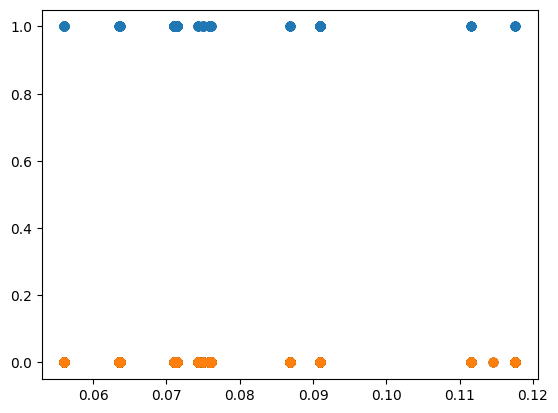

In [ ]:
display(regr.coefs())
Y_Pred = regr.predict(X_test)
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], Y_Pred)
# plt.scatter(y_test.astype(np.int16), Y_Pred)
plt.show()


In [ ]:
Y_Pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

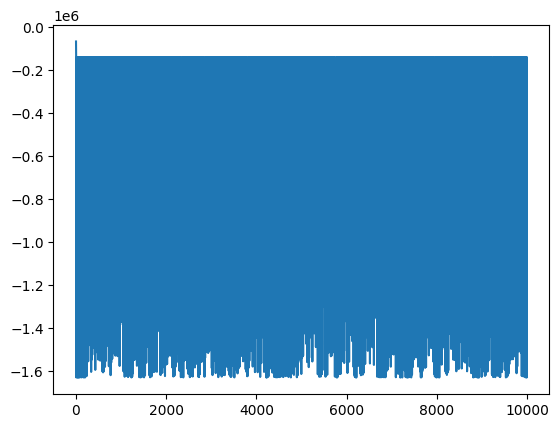

In [ ]:
plt.plot(steps, errors)

In [ ]:
errors[0], errors[-1]

(-66664.12131401271, -141747.13743990345)

In [ ]:
regr.accuracy(X_test, y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_16956\3201266516.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


0.9242397454031117

In [ ]:
(Y_Pred == y_test).sum()/(y_test.shape)[0]

0.9242397454031117

In [ ]:
regr2 = LogisticRegressionGD()

In [ ]:
steps, errors, accuracies =  regr2.fit(X_train, y_train, alpha = 0.00001, epsylon = 0.001, max_steps = 10000, Rtype = "CE")

display('Время обучения: ', time.time() - start_time, 'сек.')

C:\Users\user\AppData\Local\Temp\ipykernel_16956\3201266516.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


'Время обучения: '

2716.052682876587

'сек.'

array([[ 8.78497816e-01],
       [-4.87521229e+00],
       [ 0.00000000e+00],
       [ 6.07297654e+00],
       [ 6.58100054e-01],
       [-6.52717961e+01],
       [ 5.99083207e-02],
       [ 9.83784676e-01],
       [ 1.42979545e-01],
       [-8.78421056e+01],
       [-5.99925920e+01],
       [-4.52152386e+01],
       [-8.09968095e+01],
       [-6.14086323e+00],
       [-6.23976532e+01],
       [-1.05415177e+02],
       [ 8.71671976e-01],
       [ 1.26709439e+00],
       [ 5.65803182e+00],
       [ 1.21154186e+01],
       [ 1.65685169e+01],
       [ 2.04495506e+01],
       [-1.06448535e+01],
       [-3.67174239e+01],
       [ 4.63020582e-01]])

C:\Users\user\AppData\Local\Temp\ipykernel_16956\3201266516.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


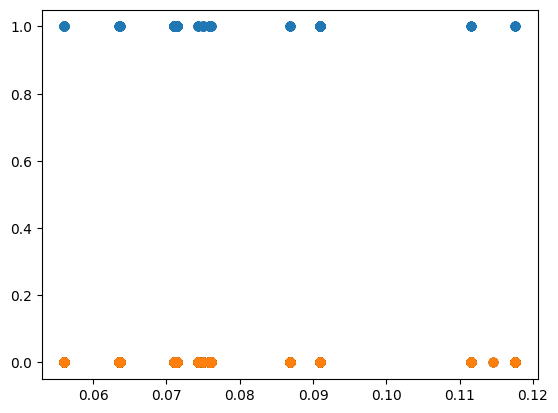

In [ ]:
display(regr2.coefs())
Y_Pred = regr2.predict(X_test)
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], Y_Pred)
# plt.scatter(y_test.astype(np.int16), Y_Pred)
plt.show()


In [ ]:
regr2.accuracy(X_test, y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_16956\3201266516.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


0.9242397454031117